## import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## load data

In [ ]:
df=pd.read_csv(r"C:\DATASCIENCE\dataset\loan_approval_dataset.csv")

In [2]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# cleaning

In [3]:
df=df.drop(['loan_id',' no_of_dependents'], axis=1)

In [4]:
df.head()

,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.isnull().sum()

education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(4269, 11)

In [8]:
df.columns

Index([' education', ' self_employed', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' loan_status'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['education', 'self_employed', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

## label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for loan_status
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])


## one-hot encoding

In [12]:
df = pd.get_dummies(df, columns=['education','self_employed'])

In [13]:
df.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,True,False,True,False
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,False,True,False,True
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,True,False,True,False
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,True,False,True,False
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,False,True,False,True


In [15]:
df.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,True,False,True,False
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,False,True,False,True
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,True,False,True,False
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,True,False,True,False
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,False,True,False,True


In [16]:
cols = df.columns.tolist()

In [17]:
cols.remove('loan_status')
cols.append('loan_status')

In [18]:
df = df.reindex(columns=cols)

In [19]:
df.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False,0
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True,1
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False,1
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False,1
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True,1


## correlation

In [20]:
cm=df.corr()
cm

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
income_annum,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.011625,-0.011625,-0.002368,0.002368,0.015189
loan_amount,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.010631,-0.010631,-0.001450,0.001450,-0.016150
loan_term,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.008417,0.008417,-0.004107,0.004107,0.113036
cibil_score,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,0.004649,0.004866,-0.004866,-0.770518
residential_assets_value,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,-0.010930,-0.006144,0.006144,0.014367
commercial_assets_value,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,0.006763,0.017998,-0.017998,-0.008246
luxury_assets_value,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,-0.012471,-0.004413,0.004413,0.015465
bank_asset_value,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.009424,0.000215,-0.000215,0.006778
education_ Graduate,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,1.000000,-1.000000,0.023224,-0.023224,-0.004918
education_ Not Graduate,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,-1.000000,1.000000,-0.023224,0.023224,0.004918


## heat map

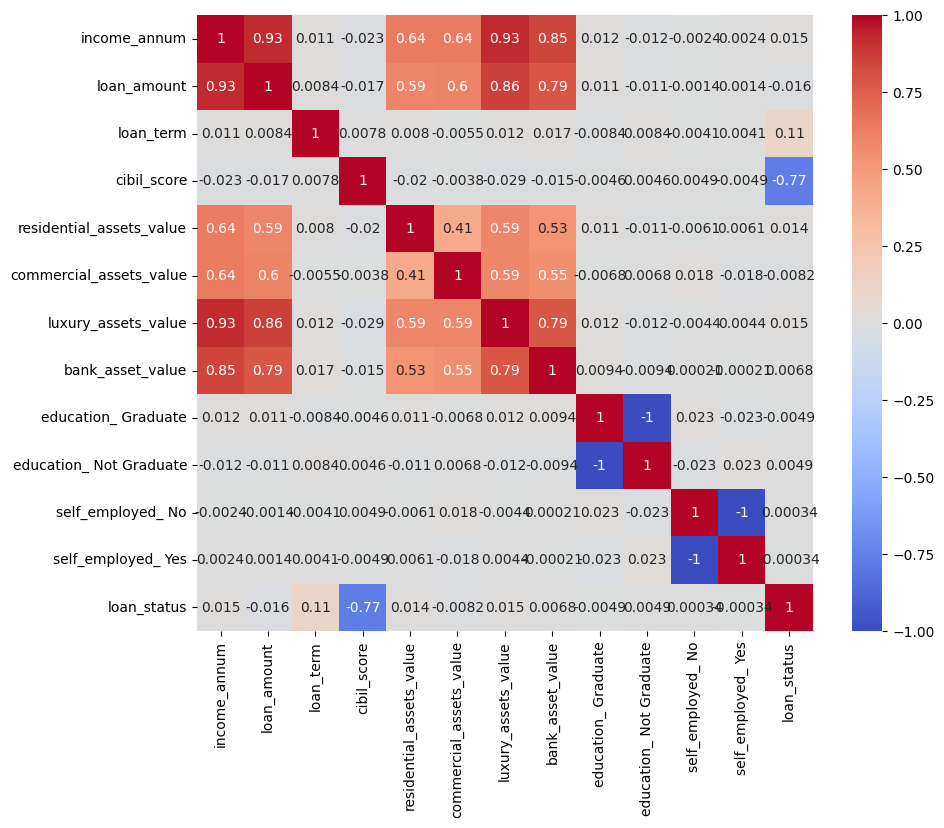

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='coolwarm',square=True)
plt.show()

# classification

In [22]:
df.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False,0
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True,1
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False,1
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False,1
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True,1


## Random Forest Classifier Model

In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100,random_state=42)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9754098360655737


## Model Evaluation Metrics

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)


accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", auc)


fi = rfc.feature_importances_
print("Feature Importance:")
print(fi)

Accuracy: 0.9754098360655737
Confusion Matrix:
[[528   8]
 [ 13 305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

ROC-AUC: 0.9720970618605087
Feature Importance:
[0.02021714 0.03138908 0.05972787 0.79755643 0.02241208 0.0201311
 0.02078633 0.01872273 0.00197769 0.00204887 0.00254486 0.00248583]
